In [1]:
import numpy as np
from EM import NiftiManager, Evaluate, EM

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

In [2]:
NM                      = NiftiManager()
EVAL                    = Evaluate()

2023-11-06 22:00:10.742 | INFO     | EM:fit:645 - Fitting the algorithm with 20 iterations.
2023-11-06 22:00:10.833 | INFO     | EM:initialize_parameters:390 - Initializing model parameters using 'kmeans'.
2023-11-06 22:00:11.699 | INFO     | EM:fit:670 - Iterations performed: 5. Displaying the segmentation result..
2023-11-06 22:00:11.721 | INFO     | EM:correct_pred_labels:610 - Finished segmentation. Correcting prediction labels...


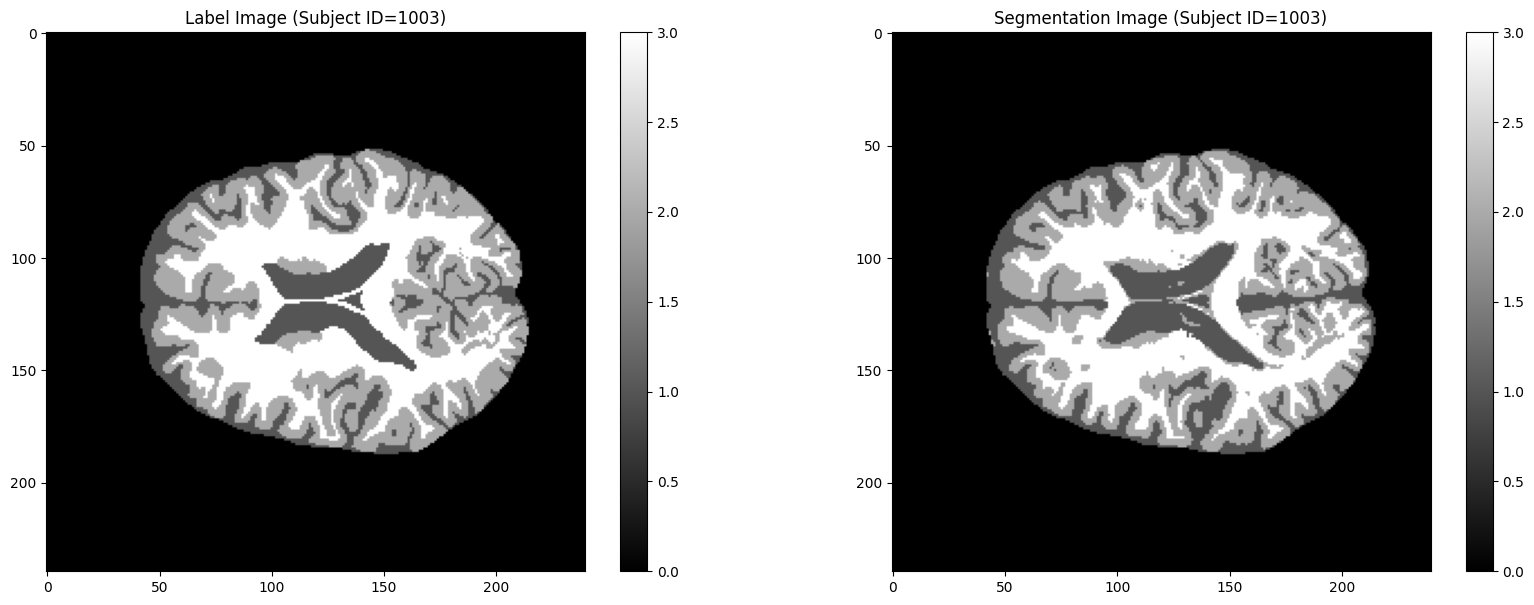

In [49]:
'''
To correct the labels, we must uncommend the prior label object specified for this dataset, where csf=1, wm=2, gm=3.
'''

# t1_path         = '../Lab 1/P2_data/5/T1.nii'
# t2_path         = '../Lab 1/P2_data/5/T2_FLAIR.nii'
# labels_gt_file  = '../Lab 1/P2_data/5/LabelsForTesting.nii'

# # read the labels gt file
# labels_nifti, _ = NM.load_nifti(labels_gt_file)

# # initialize EM for multi-modal segmentation
# ExpectationMaximization = EM(
#     K=3,
#     params_init_type = "kmeans",
#     modality='multi'
# )

# # perform EM algorithm
# segmentation_result = ExpectationMaximization.fit(
#     n_iterations = 20,
#     labels_gt_file = labels_gt_file,
#     t1_path = t1_path,
#     t2_path = t2_path,
#     correct_labels = True,
#     # tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv'
# )
# NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=24)

**KMeans Init** 

2023-11-10 09:13:54.162 | INFO     | EM:fit:745 - Fitting the algorithm with 20 iterations.
2023-11-10 09:13:56.031 | INFO     | EM:initialize_parameters:506 - Initializing model parameters using 'kmeans'.
2023-11-10 09:14:13.271 | INFO     | EM:fit:770 - Iterations performed: 20. Displaying the segmentation result..
2023-11-10 09:14:14.291 | INFO     | EM:correct_pred_labels:700 - Finished segmentation. Correcting prediction labels...


CSF DICE:  0.5935510800375339
GM DICE:  0.9076451140784954
WM DICE:  0.8998637662440961


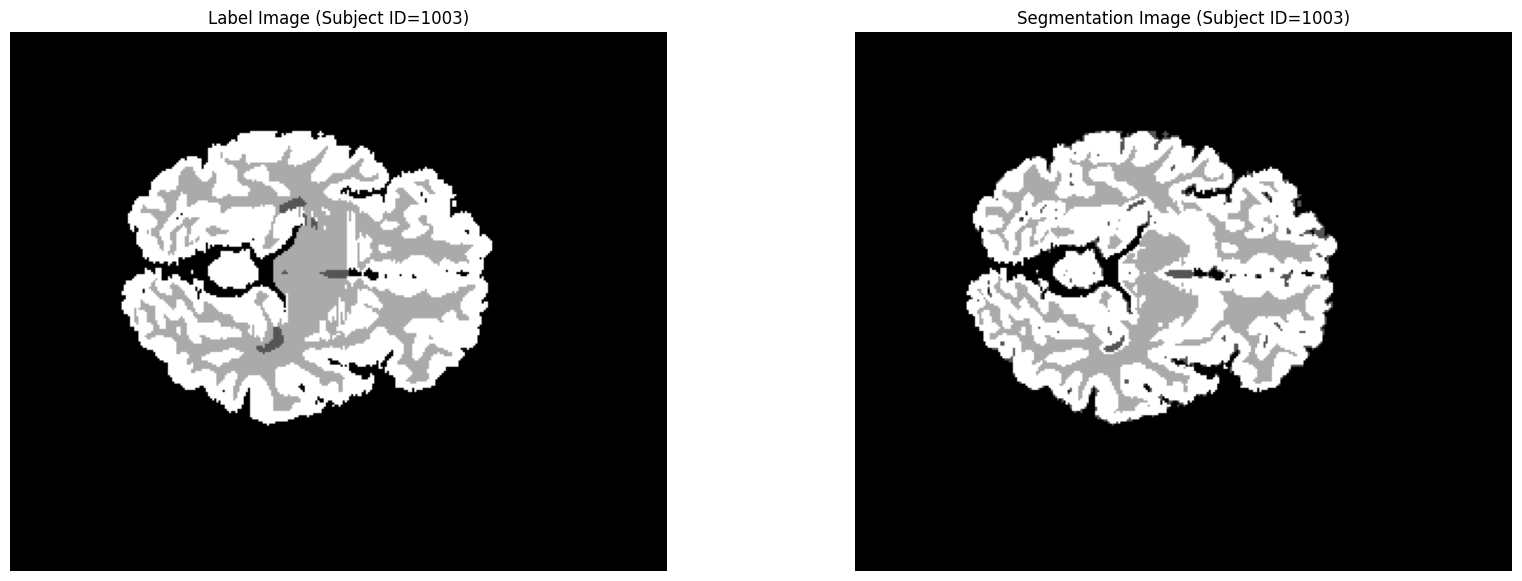

In [37]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "kmeans",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True
)


# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Tissue Models Init** 

2023-11-10 09:09:52.300 | INFO     | EM:fit:746 - Fitting the algorithm with 20 iterations.
2023-11-10 09:09:54.661 | INFO     | EM:initialize_parameters:506 - Initializing model parameters using 'tissue_models'.
2023-11-10 09:10:13.553 | INFO     | EM:fit:771 - Iterations performed: 20. Displaying the segmentation result..
2023-11-10 09:10:14.518 | INFO     | EM:correct_pred_labels:701 - Finished segmentation. Correcting prediction labels...


CSF DICE:  0.8285704813684501
GM DICE:  0.9349867625070252
WM DICE:  0.8877938540606878


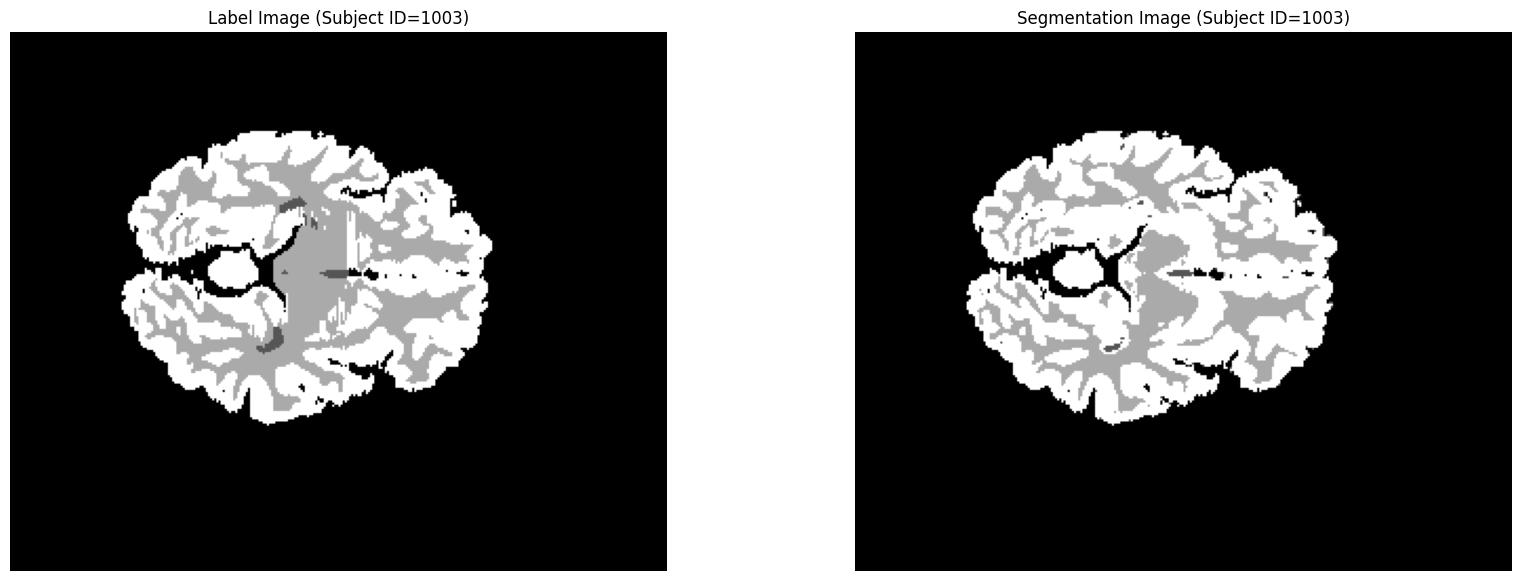

In [33]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv'
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Atlas Init**

2023-11-10 09:10:43.873 | INFO     | EM:fit:746 - Fitting the algorithm with 20 iterations.
2023-11-10 09:10:46.568 | INFO     | EM:initialize_parameters:506 - Initializing model parameters using 'atlas'.
2023-11-10 09:11:07.740 | INFO     | EM:fit:771 - Iterations performed: 20. Displaying the segmentation result..
2023-11-10 09:11:08.723 | INFO     | EM:correct_pred_labels:701 - Finished segmentation. Correcting prediction labels...


CSF DICE:  0.749388897650139
GM DICE:  0.940918500139726
WM DICE:  0.9139848663931117


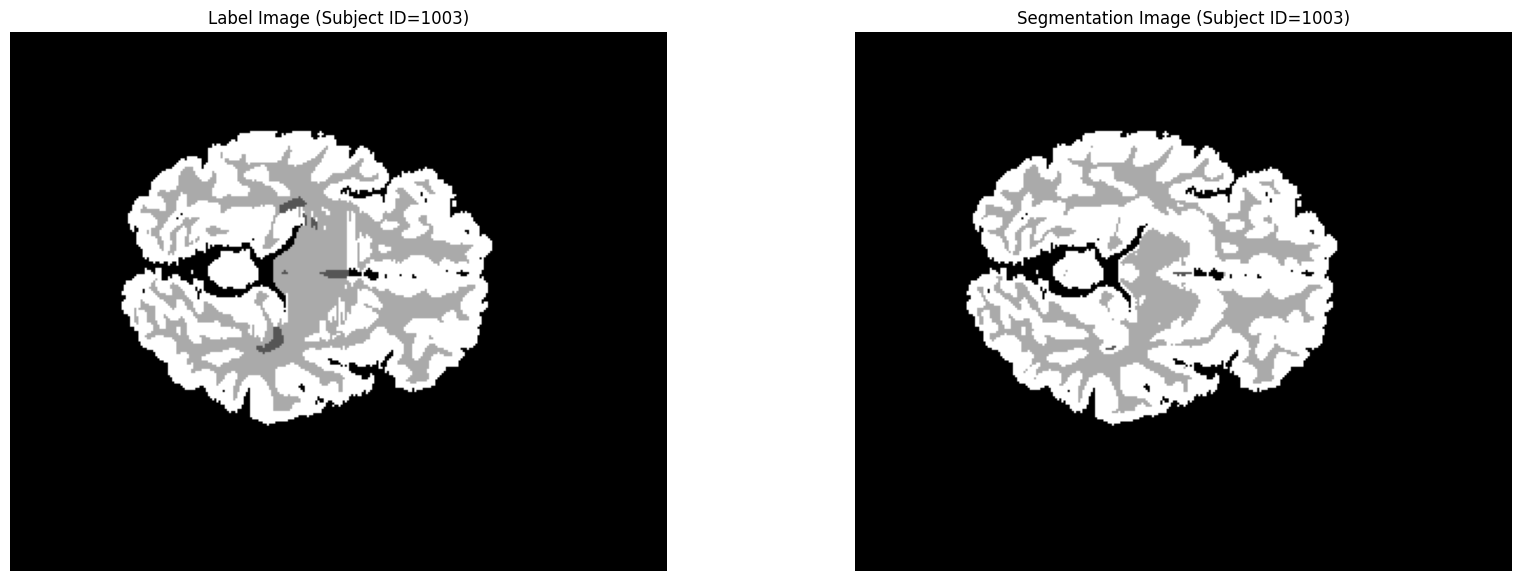

In [34]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    atlas_csf = NM.load_nifti('output/labels/output_1025/mean_csf/result.nii')[0],
    atlas_wm  = NM.load_nifti('output/labels/output_1025/mean_wm/result.nii')[0],
    atlas_gm  = NM.load_nifti('output/labels/output_1025/mean_gm/result.nii')[0]
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Initializing using both tissue models and atlases**

2023-11-10 09:13:26.351 | INFO     | EM:fit:745 - Fitting the algorithm with 20 iterations.
2023-11-10 09:13:27.930 | INFO     | EM:initialize_parameters:506 - Initializing model parameters using 'tissue_models_atlas'.
2023-11-10 09:13:44.585 | INFO     | EM:fit:770 - Iterations performed: 20. Displaying the segmentation result..
2023-11-10 09:13:45.209 | INFO     | EM:correct_pred_labels:700 - Finished segmentation. Correcting prediction labels...


CSF DICE:  0.7289050992494185
GM DICE:  0.9313152519753548
WM DICE:  0.887794601414978


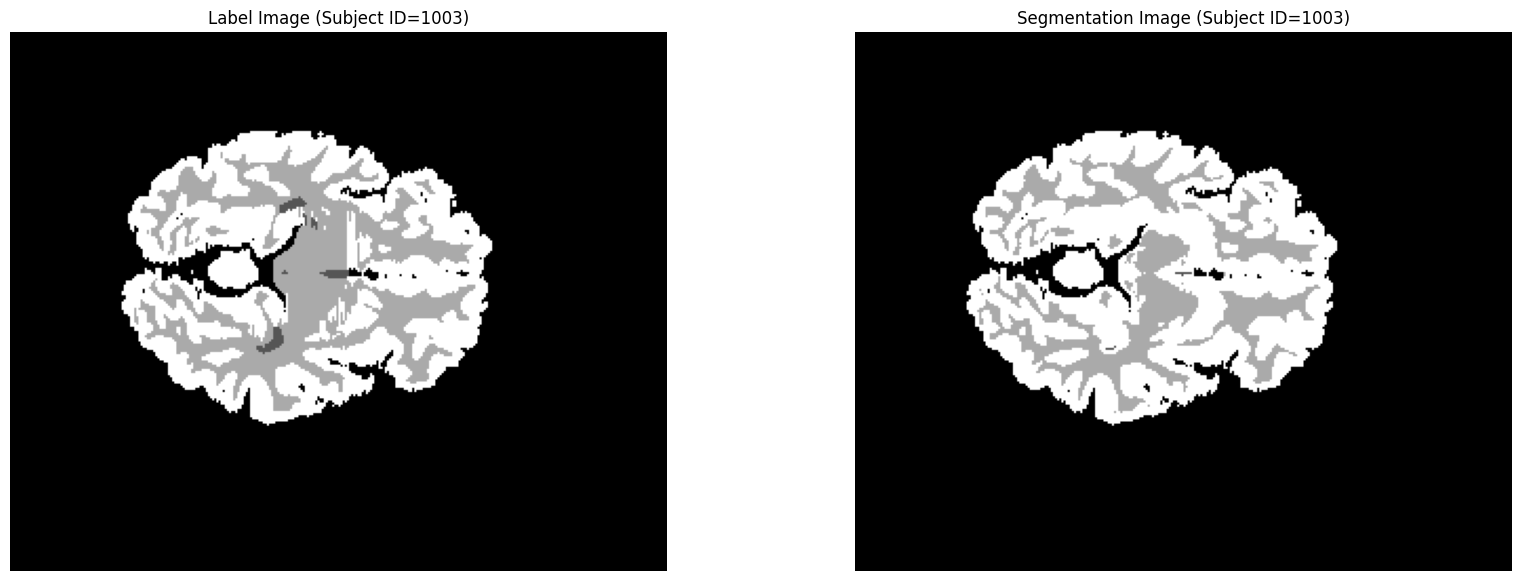

In [36]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
    atlas_csf = NM.load_nifti('output/labels/output_1025/mean_csf/result.nii')[0],
    atlas_wm  = NM.load_nifti('output/labels/output_1025/mean_wm/result.nii')[0],
    atlas_gm  = NM.load_nifti('output/labels/output_1025/mean_gm/result.nii')[0]
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)